# Fichier Notebook de démonstration d'utilisatio de la dépendance de Pycaret

## Importation des dépendances nécessaires

In [1]:
from pycaret.regression import *

## Importation de données

In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Configuration

In [3]:
s = setup(data, target = 'charges')

,Description,Value
0,Session id,4555
1,Target,charges
2,Target type,Regression
3,Data shape,"(1338, 10)"
4,Train data shape,"(936, 10)"
5,Test data shape,"(402, 10)"
6,Ordinal features,2
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


## Comparaison

In [4]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2331.7894,18976479.9490,4264.2684,0.8637,0.3899,0.2578,0.0190
lightgbm,Light Gradient Boosting Machine,2588.3769,20516735.5731,4466.9545,0.8528,0.4562,0.3027,0.0220
rf,Random Forest Regressor,2464.5447,20919077.6220,4525.8409,0.8499,0.4141,0.2724,0.0450
et,Extra Trees Regressor,2470.9022,22999334.3312,4761.4520,0.8370,0.4275,0.2765,0.0410
ada,AdaBoost Regressor,4105.3066,26109338.0030,5046.4749,0.8125,0.5712,0.6371,0.0130
llar,Lasso Least Angle Regression,3927.0019,32807403.2173,5703.0391,0.7681,0.5186,0.3856,0.0110
ridge,Ridge Regression,3947.1696,32828648.5289,5705.3494,0.7679,0.5171,0.3890,0.0120
lar,Least Angle Regression,3932.9127,32827396.1897,5705.0826,0.7679,0.5159,0.3868,0.0120
br,Bayesian Ridge,3939.3011,32827422.1656,5705.1579,0.7679,0.5160,0.3878,0.0110
lasso,Lasso Regression,3933.1961,32826194.2479,5704.9632,0.7679,0.5156,0.3868,0.1540


In [5]:
print(best)

GradientBoostingRegressor(random_state=4555)


## Evaluation

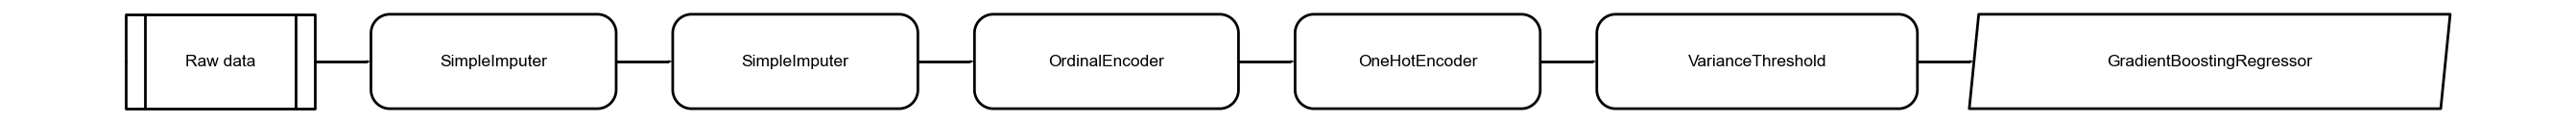

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [6]:
evaluate_model(best)

## Plot model - Residuals

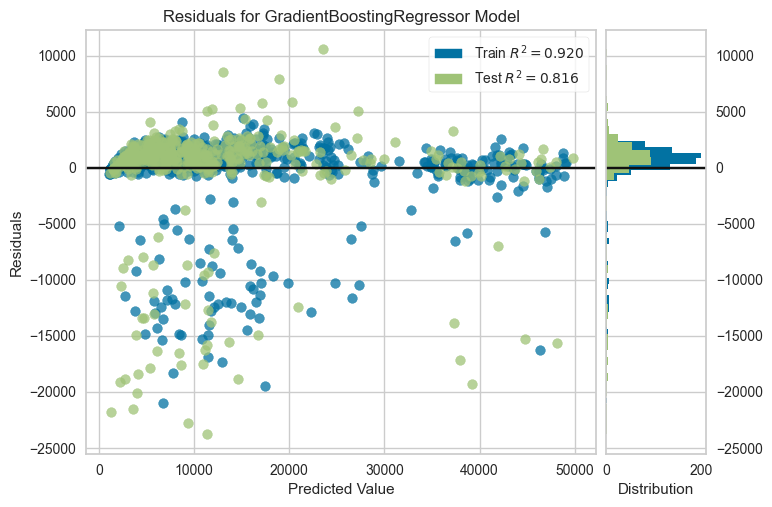

In [7]:
plot_model(best, plot = 'residuals')

## Plot model - Feature

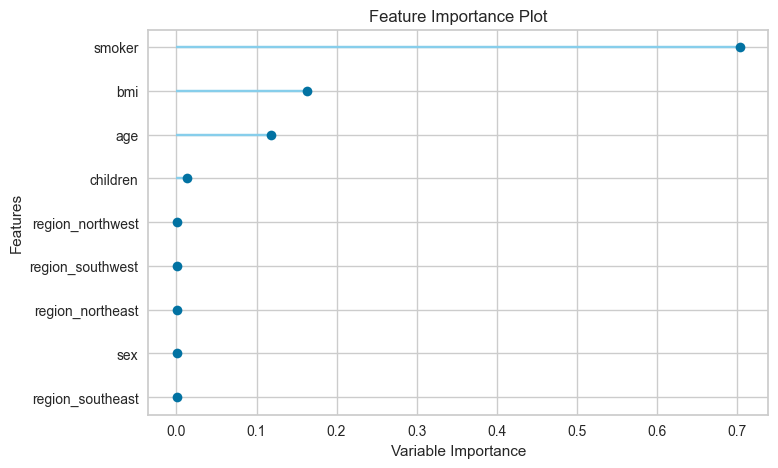

In [8]:
plot_model(best, plot = 'feature')

## Save model

In [9]:
save_model(best, 'my_best_pipeline')

# Export une fichier .pkl

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\ESIEE-IT\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(fill_value='constant',
                                                               strategy='constant'))),
                 ('ordinal_encodi...
                                                                         {'col': 'smoker',
                                                                          'mapping': {nan: -1,
                                                                                      'no': 0,
                                                                                      'yes': 1}}]))),
                 ('onehot_encodin

## Création d'une API

Pycaret est aussi capable de générer une API.

> *La commande ci-dessous génére un fichier "my_api.py".*

In [10]:
create_api(load_model, 'my_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_api.py


## Docker

### Création d'un Dockerfile

Pycaret est aussi capable de créer un Dockerfile pour encapsuler une API dans un conteneur Docker.

> *La commande ci-dessous créra un fichier "Dockerfile".*

In [11]:
create_docker('my_api.py')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


### Lecture d'informations

Les commandes ci-dessous permettent de lire des informations.

In [12]:
%cat requirements.txt

UsageError: Line magic function `%cat` not found.


In [ ]:
%cat Dockerfile

### Création d'un image Docker

Pycaret est aussi capable de créer une image Docker à partir d'un Dockerfile pour encapsuler une API dans un conteneur Docker.

In [ ]:
!Docker image build -f "Dockerfile" -t docker_test:IMAGE_TAG